In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import time
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt 
from timeit import default_timer as timer
%matplotlib inline


# Gather Data:

## 1. Twitter Archive Enhanced Data:

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

## 2. Image Prediction Data:

In [4]:
image_df = pd.read_csv('image_predictions.tsv',sep = '\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
image_df.shape

(2075, 12)

## 3. Additional Data via the Twitter API

In [6]:
tweet_ids = image_df.tweet_id.values
len(tweet_ids)

2075

In [7]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [8]:
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 666020888022790149
Success
2: 666029285002620928
Success
3: 666033412701032449
Success
4: 666044226329800704
Success
5: 666049248165822465
Success
6: 666050758794694657
Success
7: 666051853826850816
Success
8: 666055525042405380
Success
9: 666057090499244032
Success
10: 666058600524156928
Success
11: 666063827256086533
Success
12: 666071193221509120
Success
13: 666073100786774016
Success
14: 666082916733198337
Success
15: 666094000022159362
Success
16: 666099513787052032
Success
17: 666102155909144576
Success
18: 666104133288665088
Success
19: 666268910803644416
Success
20: 666273097616637952
Success
21: 666287406224695296
Success
22: 666293911632134144
Success
23: 666337882303524864
Success
24: 666345417576210432
Success
25: 666353288456101888
Success
26: 666362758909284353
Success
27: 666373753744588802
Success
28: 666396247373291520
Success
29: 666407126856765440
Success
30: 666411507551481857
Success
31: 666418789513326592
Success
32: 666421158376562688
Success
33: 6664282763494

KeyboardInterrupt: 

In [ ]:
print('Failure:',len(fails_dict))
print('Success:',count)

In [ ]:
twitter_list = []

with open('tweet_json.txt') as data:
    for line in data:
        twitter_list.append(json.loads(line))
len(twitter_list)

In [ ]:
tweet = pd.DataFrame(twitter_list, columns = ['id','favorite_count','retweet_count'])

In [ ]:
tweet.head()

In [ ]:
tweet.info()

In [ ]:
tweet = tweet.rename({'id': 'tweet_id'}, axis=1) #rename col name for consistency

In [ ]:
tweet.to_csv('tweet-json.csv',index=False)

# Access Data:

## 1. Twitter Archive Enhanced Data:

In [9]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [13]:
df['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
            ... 
Duchess        1
Goose          1
Naphaniel      1
Pip            1
Aiden          1
Name: name, Length: 957, dtype: int64

In [14]:
df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [15]:
df['retweeted_status_user_id'].value_counts().sum()

181

In [16]:
df[df['rating_numerator'] == 1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [17]:
df[df['rating_numerator'] == 960]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [18]:
df[df['rating_numerator'] == 666]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [19]:
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [20]:
df[df['rating_denominator'] != 10 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [21]:
df[df['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [22]:

sum(df.tweet_id.duplicated())

0

**COMMENT:** All tweet ids are distinct, which is good

In [23]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

## 2. Image Prediction Data:

In [24]:
image_df = pd.read_csv('image_predictions.tsv',sep = '\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [25]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
image_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [27]:
image_df.duplicated().value_counts()

False    2075
dtype: int64

### COMMENT: 
- It seems like image prediction data is quite clean (no duplicates, no nulls, reasonable data types)
- There are only 2075 observations while the archived Twitter data has 2356 records. This indicates there are 281 tweets will no image but not text

## 3. Additional Data via the Twitter API

In [28]:
tweet = pd.read_csv('tweet-json.csv')
tweet.head()

,tweet_id,favorite_count,retweet_count
0,666020888022790149,2328,439
1,666029285002620928,117,41
2,666033412701032449,105,38
3,666044226329800704,254,119
4,666049248165822465,92,37


In [29]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2059 non-null   int64
 1   favorite_count  2059 non-null   int64
 2   retweet_count   2059 non-null   int64
dtypes: int64(3)
memory usage: 48.4 KB


In [30]:
tweet.tweet_id.duplicated().sum()

0

### Quality:
1. Twitter Archived Enhanced Data:
    - Poor data format (timestamp shouldn't be object)
    - `source`: html format
    - `name` : There are a lot of observations have 'None' as name (should be null) then there is name like 'a' (invalid name)
    - `retweeted_status_user_id`: There are 181 retweets (not NAN values)
    - `rating_numerator`,`rating_denominator` : There are a few unusual records for rating_numerator 1776,960,666 while their rating_denominators are relatively low. For rating_num = 960, its denominator = 0, which is invalid (row 313). 
    - `rating_denominator` : It seems like typical rating denominator should be 10 (2333 records). There are 23 records that have rating_deno not equal to 10
    

2. Image Prediction Data:
    - There are only 2075 observations while the archived Twitter data has 2356 records. This indicates there are 281 tweets will no image but not text

3. Additional Data via the Twitter API:
    - Only 2059 observations (missing IDs)
    
### Tidiness:
1. Twitter Archive Enhanced Data:
    - There is no reason to have 4 seperate columns of dog's types (doggo, floofer, pupper, puppo). We can create only 1 column called `dog_type`
    
Merging 3 datasets into `twitter_archive_enhanced.csv`

# CLeaning Data:

## Copy:

In [31]:
archived_clean = df.copy()
image_df_clean = image_df.copy()
tweet_clean = tweet.copy()

## 1. Twitter Archive Enhanced Data:


In [32]:
archived_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### Define:
- Remove 181 retweets and drop columns not in use
- 'None' to NA values in `name` column
#### Code:

In [33]:
archived_clean = archived_clean[archived_clean['retweeted_status_user_id'].isnull()]

In [34]:
archived_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'],inplace=True,axis=1)

In [35]:
archive_clean = archived_clean['name'].replace('None', np.nan, inplace=True)

#### Test:

In [36]:
archived_clean['name'].value_counts()

a          55
Lucy       11
Charlie    11
Oliver     10
Cooper     10
           ..
Rooney      1
Jeffrie     1
Shawwn      1
Kuyu        1
Aiden       1
Name: name, Length: 955, dtype: int64

In [37]:
archived_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


#### Define:
- Drop 4 dog types columns
- Merge 4 redundant columns of dog types in 1 column - dog_type

#### Code:

In [38]:
archived_clean['dog_type'] = archived_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [39]:
archived_clean = archived_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)

In [40]:
archived_clean['dog_type'].value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_type, dtype: int64

#### Test:

In [41]:
archived_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


#### Define:
- `timestamp` in datetime format

#### Code:

In [42]:
archived_clean['timestamp'] = pd.to_datetime(archived_clean['timestamp'])

In [43]:
archived_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   rating_numerator    2175 non-null   int64              
 4   rating_denominator  2175 non-null   int64              
 5   name                1495 non-null   object             
 6   dog_type            364 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 135.9+ KB


#### Test:

In [44]:
archived_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


## Twitter Archive Master:

In [45]:
twitter_archive_master = pd.merge(archived_clean,image_df_clean,how='right',on = 'tweet_id')

**COMMENT:** Right join archived_clean to image_df_clean because I only take 2075 ids that can be image-predicted 

In [46]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2075 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   text                1994 non-null   object             
 3   rating_numerator    1994 non-null   float64            
 4   rating_denominator  1994 non-null   float64            
 5   name                1448 non-null   object             
 6   dog_type            326 non-null    object             
 7   jpg_url             2075 non-null   object             
 8   img_num             2075 non-null   int64              
 9   p1                  2075 non-null   object             
 10  p1_conf             2075 non-null   float64            
 11  p1_dog              2075 non-null   bool               
 12  p2                  2075 non-null 

In [47]:
twitter_archive_master = pd.merge(twitter_archive_master,tweet_clean,how='left',on = 'tweet_id')

In [48]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2075 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   text                1994 non-null   object             
 3   rating_numerator    1994 non-null   float64            
 4   rating_denominator  1994 non-null   float64            
 5   name                1448 non-null   object             
 6   dog_type            326 non-null    object             
 7   jpg_url             2075 non-null   object             
 8   img_num             2075 non-null   int64              
 9   p1                  2075 non-null   object             
 10  p1_conf             2075 non-null   float64            
 11  p1_dog              2075 non-null   bool               
 12  p2                  2075 non-null 

#### Define:
- Remove all NAN retweets from result of merging

In [53]:
twitter_archive_master.isnull().sum()

tweet_id                 0
timestamp               81
text                    81
rating_numerator        81
rating_denominator      81
name                   627
dog_type              1749
jpg_url                  0
img_num                  0
p1                       0
p1_conf                  0
p1_dog                   0
p2                       0
p2_conf                  0
p2_dog                   0
p3                       0
p3_conf                  0
p3_dog                   0
favorite_count          16
retweet_count           16
dtype: int64

In [54]:
twitter_archive_master = twitter_archive_master[twitter_archive_master['retweet_count'].notnull()]

In [55]:
twitter_archive_master['favorite_count'] = twitter_archive_master['favorite_count'].astype('int64')
twitter_archive_master['retweet_count'] = twitter_archive_master['retweet_count'].astype('int64')

In [56]:
twitter_archive_master.isnull().sum()

tweet_id                 0
timestamp               72
text                    72
rating_numerator        72
rating_denominator      72
name                   618
dog_type              1735
jpg_url                  0
img_num                  0
p1                       0
p1_conf                  0
p1_dog                   0
p2                       0
p2_conf                  0
p2_dog                   0
p3                       0
p3_conf                  0
p3_dog                   0
favorite_count           0
retweet_count            0
dtype: int64

## To CSV:

In [57]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

# Visualization:

In [58]:
twitter_archive_master.p1.value_counts()

golden_retriever      150
Labrador_retriever     97
Pembroke               88
Chihuahua              81
pug                    57
                     ... 
coral_reef              1
dining_table            1
minibus                 1
African_crocodile       1
coffee_mug              1
Name: p1, Length: 378, dtype: int64

Text(0.5, 1.0, 'Count plot of dog types')

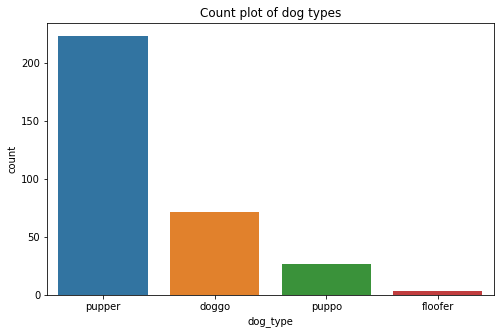

In [59]:
plt.figure(figsize=[8, 5])
sns.countplot(data = twitter_archive_master,x='dog_type')
plt.title('Count plot of dog types')

**INSIGHT:** Most of the observations refer to "pupper" type

Text(0.5, 1.0, 'Favorite dog types according to favorite Tweets')

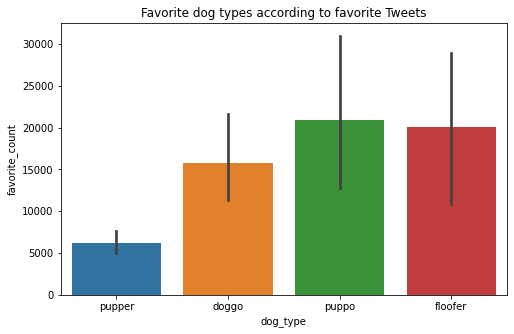

In [64]:
plt.figure(figsize=[8, 5])
sns.barplot(data=twitter_archive_master, x='dog_type', y='favorite_count')
plt.title('Favorite dog types according to favorite Tweets')

**INSIGHT:** 'puppo' is the most popular dog breed according to favorite counts

Text(0.5, 1.0, 'Favorite dog types according to retweets')

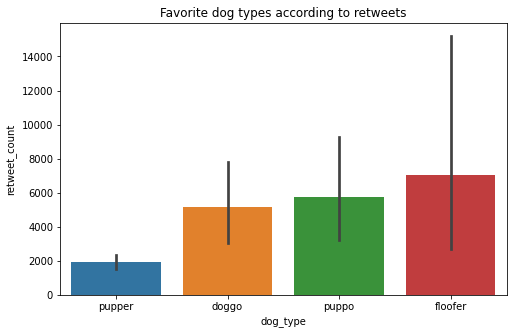

In [65]:
plt.figure(figsize=[8,5])
sns.barplot(data=twitter_archive_master, x='dog_type', y='retweet_count')
plt.title('Favorite dog types according to retweets')

**INSIGHT:** 'floofer' is the most popular dog type to be retweeted